In [1]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(microViz)
library("ggpubr")
library("speedyseq")

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
microViz version 0.12.7 - Copyright (C) 2021-2025 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For cita

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11,
12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) %>% 
mutate(
  Genotype = Genotype %>%
    str_replace_all("Kelsey-1", "Kelsey1") %>%
    str_replace_all("Cooper-9", "Cooper9")
)

meta$Genotype<-factor(meta$Genotype, 
                              levels=c("FM19", "FM6", "FM9", "U44",
                                       "FM14", "Elkhorn","K2",
                                      "Acerv2", "Kelsey1", "Cooper9"))


In [4]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 280 samples ]:
sample_data() Sample Data:        [ 280 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [5]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


ps=subset_taxa(ps, Phylum!="NA")
ps

ps_merge = merge_samples2(ps, "Tag")
ps_merge

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 252 samples ]:
sample_data() Sample Data:        [ 252 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 252 samples ]:
sample_data() Sample Data:        [ 252 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 186 samples ]:
sample_data() Sample Data:        [ 186 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [6]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired


#only nutrient and placebo
ps_placebo_un =subset_samples(ps_paired, Diseased=="Placebo")
ps_placebo_un

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 192 samples ]:
sample_data() Sample Data:        [ 192 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 151 samples ]:
sample_data() Sample Data:        [ 151 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 76 samples ]:
sample_data() Sample Data:        [ 76 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [7]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_both = subset_samples(ps_Clipped, filter_unpair=="no")
ps_both

ps_placebo_un =subset_samples(ps_both, Diseased=="Placebo")
ps_placebo_un

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 192 samples ]:
sample_data() Sample Data:        [ 192 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 151 samples ]:
sample_data() Sample Data:        [ 151 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 174 samples ]:
sample_data() Sample Data:        [ 174 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 9492 taxa and 95 samples ]:
sample_data() Sample Data:        [ 95 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 9492 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 9492 tips and 8365 internal nodes ]:
taxa are rows

In [8]:
ps_placebo_un_fill = filter_taxa(ps_placebo_un, function(x) sum(x) > 50, TRUE) %>% tax_fix()
ps_placebo_un_fill
                           
                                                                                    

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 1176 taxa and 95 samples ]:
sample_data() Sample Data:        [ 95 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 1176 taxa by 8 taxonomic ranks ]:
phy_tree()    Phylogenetic Tree:  [ 1176 tips and 1056 internal nodes ]:
taxa are rows

In [9]:

sample_data(ps_placebo_un_fill) %>%
  group_by(Combo, Health) %>%
  summarize(count = n()) #%>%
  #summarize(total = sum(count))

`summarise()` has grouped output by 'Combo'. You can override using the
`.groups` argument.


Combo,Health,count
<chr>,<chr>,<int>
Ambient_Placebo,AH,30
Ambient_Placebo,DL,1
NH4_Placebo,AH,43
NH4_Placebo,DL,21


In [10]:
set.seed(123)
output = ancombc2(data = ps_placebo_un_fill , tax_level = "ASVs",
                  fix_formula = "Combo", 
                  #rand_formula = "(1| Genotype)",
                  p_adj_method = "holm",  pairwise = TRUE,
                  group = "Combo",struc_zero = TRUE, alpha = 0.001,
                  dunnet = TRUE,
                  prv_cut = 0.01, 
                  n_cl=4, lib_cut = 1000
                  #lme_control = lme4::lmerControl()
                 )
        

Checking the input data type ...

The input data is of type: phyloseq

PASS

Checking the sample metadata ...

The specified variables in the formula: Combo

The available variables in the sample metadata: sample_names, featurecounts, Initial_sample_ID, Tag, start_date, event_date, collection_date, Date, TimePoint, Replicate, Genotype, label, Nursery, Lat, Long, lat_long, organism, geo_loc_name, env_local_scale, env_broad_scale, env_medium, waterBody, countryCode, amplicon_sequenced, Nutrients, Diseased, Combo, Tank_N, Tank_D1, Tank_D2, Type, Health, Outcome, Notes, Severity, Survivorship, Pairs, filter_unpair, Combo_health, Archive_box, Genotype.1, NH4_Susceptibility, Disease_Susceptibility, NH4_Disease_Susceptibility, Expected, Surv_disease, Surv_nutrients, surv, std.err, barcode_label, barcode_seq, ID, Sequencing_Round, Plate_Name, Plate_Barcode, Well_Position, Sequence_Name, Illumina5_Adapter, Forward_Primer_Pad, Golay_Barcode, X515FB_Forward_Primer, Primer_For_PCR

PASS

Checking 

In [11]:
res=output$res
head(res)

dim(res)

taxa_df = tax_table(ps_placebo_un_fill) %>% as.data.frame() %>% rownames_to_column("taxon")
head(taxa_df)

df_fig = res %>% left_join(taxa_df, by = "taxon")
dim(df_fig)
head(df_fig)

,taxon,lfc_(Intercept),lfc_ComboNH4_Placebo,se_(Intercept),se_ComboNH4_Placebo,W_(Intercept),W_ComboNH4_Placebo,p_(Intercept),p_ComboNH4_Placebo,q_(Intercept),q_ComboNH4_Placebo,diff_(Intercept),diff_ComboNH4_Placebo,passed_ss_(Intercept),passed_ss_ComboNH4_Placebo
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,3e25ffb24420d1120183e84047dd818e,0.4860381,-0.9629662,0.04487811,0.1357772,10.830182,-7.092252,0.008418166,0.01930682,1,1,FALSE,FALSE,TRUE,TRUE
2,cbfd4b77b41358f00d733a53c6e5f65c,-1.0107959,2.2738529,NaN,0.1273730,NaN,17.851929,1.000000000,1.00000000,1,1,FALSE,FALSE,TRUE,TRUE
3,536dedef3e7a8a5e5f98fb8134869ac6,-1.5783703,3.3286411,NaN,0.1273730,NaN,26.133028,1.000000000,1.00000000,1,1,FALSE,FALSE,TRUE,TRUE
4,f3dd427acd4dd5422d28130de4a38d07,0.2768420,-1.1786077,0.04960065,0.1278708,5.581418,-9.217179,0.112863092,0.06879973,1,1,FALSE,FALSE,TRUE,TRUE
5,d1525c3fa5ef9858663670393a6771a1,0.3896455,-0.5821995,NaN,0.1345945,NaN,-4.325581,1.000000000,0.14463459,1,1,FALSE,FALSE,TRUE,TRUE
6,691298da35e9879de389f84b01110d60,0.4878211,-0.6184558,NaN,0.1286259,NaN,-4.808176,1.000000000,0.13054259,1,1,FALSE,FALSE,TRUE,TRUE


[1] 283  15

,taxon,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6cd1cf07d3c8ec1d2787500a856bcd21,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Rickettsiales,g__Candidatus_Jidaibacter,s__uncultured_bacterium,ASV_4352
2,5d6819b6e0745b5b9a1950bb97e6a16e,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_III,g__Clade_III,g__Clade_III Genus,ASV_3741
3,5707d4d97b0c50e15fe0af531ec80371,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_3494
4,21c9b448af3da619a66ab4d4ad359775,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_1348
5,59f972613501351ecfe9ca0352b8a867,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_3617
6,660989d135c32adbda92de9dcb42e8ac,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__SAR11_clade,f__Clade_I,g__Clade_Ia,g__Clade_Ia Genus,ASV_4081


[1] 283  23

,taxon,lfc_(Intercept),lfc_ComboNH4_Placebo,se_(Intercept),se_ComboNH4_Placebo,W_(Intercept),W_ComboNH4_Placebo,p_(Intercept),p_ComboNH4_Placebo,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_ComboNH4_Placebo,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3e25ffb24420d1120183e84047dd818e,0.4860381,-0.9629662,0.04487811,0.1357772,10.830182,-7.092252,0.008418166,0.01930682,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Kordiimonadales,f__uncultured,g__uncultured,s__uncultured_Kordiimonas,ASV_2500
2,cbfd4b77b41358f00d733a53c6e5f65c,-1.0107959,2.2738529,NaN,0.1273730,NaN,17.851929,1.000000000,1.00000000,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__uncultured,g__uncultured Genus,ASV_8098
3,536dedef3e7a8a5e5f98fb8134869ac6,-1.5783703,3.3286411,NaN,0.1273730,NaN,26.133028,1.000000000,1.00000000,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__uncultured,g__uncultured Genus,ASV_3367
4,f3dd427acd4dd5422d28130de4a38d07,0.2768420,-1.1786077,0.04960065,0.1278708,5.581418,-9.217179,0.112863092,0.06879973,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__uncultured,g__uncultured Genus,ASV_9663
5,d1525c3fa5ef9858663670393a6771a1,0.3896455,-0.5821995,NaN,0.1345945,NaN,-4.325581,1.000000000,0.14463459,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Algimonas,s__uncultured_bacterium,ASV_8305
6,691298da35e9879de389f84b01110d60,0.4878211,-0.6184558,NaN,0.1286259,NaN,-4.808176,1.000000000,0.13054259,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Hellea,s__uncultured_Alphaproteobacteria,ASV_4212


In [12]:
df_fig = res %>% left_join(taxa_df, by = "taxon") %>%
filter(passed_ss_ComboNH4_Placebo == "TRUE") %>%
filter(p_ComboNH4_Placebo<=0.01)
dim(df_fig)
head(df_fig)
write_csv(df_fig, "/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_nutrients.csv")

[1] 36 23

,taxon,lfc_(Intercept),lfc_ComboNH4_Placebo,se_(Intercept),se_ComboNH4_Placebo,W_(Intercept),W_ComboNH4_Placebo,p_(Intercept),p_ComboNH4_Placebo,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_ComboNH4_Placebo,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ea14aa41fbcf1e8af5908e975da064b8,-0.3072238,0.6022421,0.05116294,0.1312724,-6.004811,4.587730,3.216644e-04,0.001783859,0.076877800,⋯,FALSE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Shimia,g__Shimia Genus,ASV_9309
2,2b6d08f26def800720c669720ed0d5bf,1.0637026,-1.5503706,NaN,0.1283048,NaN,-12.083500,1.000000e+00,0.001219796,1.000000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingorhabdus,g__Sphingorhabdus Genus,ASV_1730
3,6a0c68e241fa05fa8e12abab05ecd055,-1.2800207,1.6865624,0.04236102,0.1313209,-30.216948,12.843066,7.961764e-05,0.001018747,0.019904409,⋯,FALSE,TRUE,d__Bacteria,p__Acidobacteriota,c__Holophagae,o__Acanthopleuribacterales,f__Acanthopleuribacteraceae,g__Acanthopleuribacter,s__Acanthopleuribacter_pedis,ASV_4245
4,380e94062cd8f44ea50814193ad56225,0.5501413,-0.5008017,0.06678063,0.1350924,8.238036,-3.707106,3.533793e-05,0.005981176,0.009152524,⋯,FALSE,TRUE,d__Bacteria,p__Actinobacteriota,c__Actinobacteria,o__Corynebacteriales,f__Mycobacteriaceae,g__Mycobacterium,g__Mycobacterium Genus,ASV_2240
5,27236b587e524df810ee409be0d38846,-0.7465287,0.6184974,0.08466285,0.1435256,-8.817666,4.309317,2.153492e-05,0.002583039,0.005663685,⋯,FALSE,TRUE,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,g__Spirochaeta_2 Genus,ASV_1565
6,b5a357aca74c0d00b3adcc24fa98c9dd,-0.5932027,0.6228246,0.08642889,0.1445228,-6.863477,4.309526,4.385566e-05,0.001538225,0.011314761,⋯,FALSE,TRUE,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,g__Spirochaeta_2 Genus,ASV_7184


In [13]:

combo_labs <- as_labeller(c("NH4" = "NH[4]+Placebo",
                          "Ambient" = "Ambient+Placebo"), default = label_parsed)


F1 <- df_fig %>%
 #filter(passed_ss_ComboNH4_Placebo == TRUE) %>%
  mutate_if(is.character, str_replace_all, pattern = "o__", replacement = "") %>%
 
  mutate(
    direction = ifelse(lfc_ComboNH4_Placebo > 0, "NH4", "Ambient"),
    direction = factor(direction, levels = c("Ambient", "NH4"))
  ) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "c__", ""))) %>%
  ggplot(aes(x = reorder(ASVs, lfc_ComboNH4_Placebo), y = lfc_ComboNH4_Placebo, fill = direction)) +
  geom_bar(stat = "identity", color = "black") +
  geom_errorbar(aes(ymin = lfc_ComboNH4_Placebo - se_ComboNH4_Placebo, 
                    ymax = lfc_ComboNH4_Placebo + se_ComboNH4_Placebo), width = 0.2) +
  coord_flip() +
  labs(
    x = "ASVs",
    y = "Log2 Fold Change",
    fill = "Direction"
  ) +
  scale_fill_manual(values = c("NH4" = "#00688B", "Ambient" = "lightblue")) +
  facet_grid(Order ~
             direction, 
            
             space = "free", scales = "free",
             switch = "y",  labeller = labeller(direction = combo_labs)) +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_blank(),
    axis.text.x = element_text(size = 3.5),
    axis.text.y = element_blank(),
    strip.text.x = element_text(size = 4),
    strip.text.y = element_blank(),
    #  strip.text.y = element_text(size=5),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    legend.position = "none",
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")

      
  ) 


#ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/S3B.png", 
 #     width = 7, height = 5, units = "in", dpi=300)

In [14]:
psr_fill_melt = ps_placebo_un_fill  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()   


taxa_fil= df_fig %>% column_to_rownames("taxon")%>%
as.matrix


ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(taxa_fil)) %>% tax_fix()
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                     filter_unpair=="no" &  
                              Diseased=="Placebo" )
ps_ancom_APa 


psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()  


phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 36 taxa and 252 samples ]:
sample_data() Sample Data:        [ 252 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 36 taxa by 22 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 36 taxa and 135 samples ]:
sample_data() Sample Data:        [ 135 samples by 62 sample variables ]:
tax_table()   Taxonomy Table:     [ 36 taxa by 22 taxonomic ranks ]:
taxa are rows

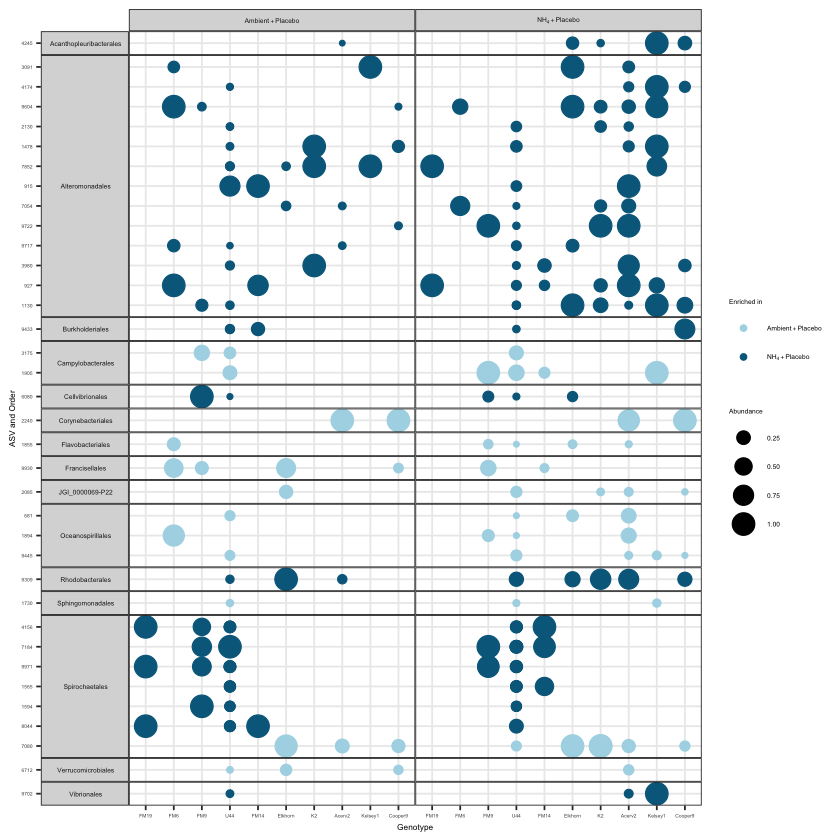

In [15]:

library(stringr)
psr_fill_melt <- psr_fill_melt %>%
  mutate(Combo = factor(Combo, levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen")))
# Define labellers
combo_labs <- as_labeller(c(
  "Ambient_Placebo" = "Ambient+Placebo",
  "Ambient_Pathogen" = "Ambient+Disease",
  "NH4_Placebo" = "NH[4]+Placebo",
  "NH4_Pathogen" = "NH[4]+Disease"
), default = label_parsed)


lab1 <- c(expression(Ambient+Placebo),
          
          expression(NH[4]+Placebo))
# Plot
F2 <- psr_fill_melt %>%
  as.data.frame() %>%
  mutate(
    Abundance = as.numeric(as.character(Abundance)),
    lfc_ComboNH4_Placebo = as.numeric(str_trim(as.character(lfc_ComboNH4_Placebo)))
  ) %>%
  filter(
   
    Abundance > 0,
    !is.na(Severity)
  ) %>%
  mutate(
    Enriched  = ifelse(lfc_ComboNH4_Placebo > 0, "NH4", "Ambient")
  ) %>%
 
  mutate(across(where(is.character), ~ str_replace_all(.x, "o__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "c__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "ASV_", ""))) %>%

  ggplot(aes(x = Genotype, y = reorder(ASVs, lfc_ComboNH4_Placebo))) +
  geom_point(aes(size = Abundance, color = Enriched)) +
  scale_color_manual("Enriched in", values = c("lightblue", "#00688B"),labels=lab1) +
  facet_grid(
    Order ~ Combo,
    space = "free",
    scales = "free",
    switch = "y",
      labeller = labeller(Combo = combo_labs
    )
  ) +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.x = element_text(size = 3),
    axis.text.y = element_text(size = 3),
    strip.text.y = element_text(size = 4),
    strip.text.y.left = element_text(angle = 0),
    strip.text.x = element_text(size = 4),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4),
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  ) +
#theme(axis.text.x = element_text(angle = 20, hjust = 1)) +
guides(fill = guide_legend(keywidth = 0.30, , keyheight =.60, ncol=1)) +
  ylab("ASV and Order")
F2

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(d[d > tolerance]):
“no non-missing arguments to min; returning Inf”
Warning message in min(x

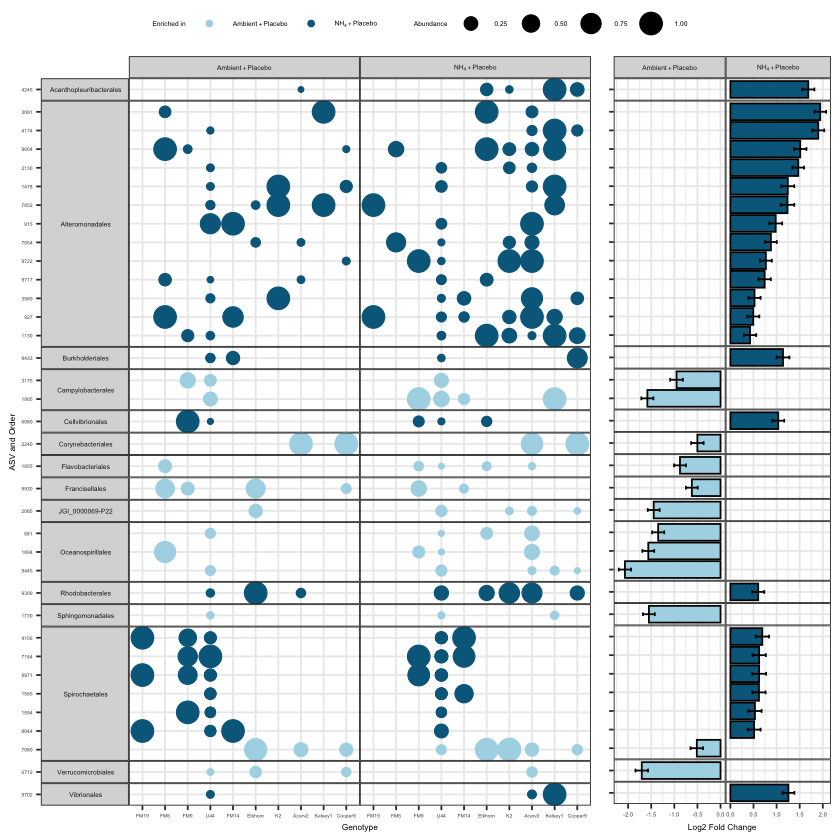

In [16]:
 ggpubr::ggarrange(F2, F1, common.legend = TRUE, legend = "top",
                   widths=c(2,0.8))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/SuppFig3.png", 
      width = 7, height = 5, units = "in", dpi=300)

In [17]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.6.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] speedyseq_0.5.3.9021 ggpubr_0.6.0         microViz_0.12.7     
 [4] lubridate_1.9.4      forcats_1.0.0        stringr_1.5.1       
 [7] dplyr_1.1.4          purrr_1.0.4          readr_2.1.5         
[10] tidyverse_2.0.0      microbiome_1.30.0    phyloseq_1.52.0     
[13] ggplot2_4.0.0        tibble_3.3.0         tidyr_1.3.1         
[16] qiime2R_0.99.6       ANCOMBC_2.10.0      

loaded via a namespace (and no